# Trainability issues in PQC-based Softmax policies 

### Table of contents

1. [Simplified two-design - global measurement and |A|=2](#s2d_global_A=2)
2. [Simplified two-design - local measurement and |A|=2](#s2d_local_A=2)
3. [Simplified two-design - Partial measurement and |A|=2](#s2d_partial_A=2)
4. [Simplified two-design - Partial measurement and A={4,8,16}](#s2d_partial_A=4_8_16)
5. [Strongly Entangling Layers - global measurement and |A|=2](#sel_global_A=2)
6. [Strongly Entangling Layers - local measurement and |A|=2](#sel_local_A=2)
7. [Strongly Entangling Layers - Partial measurement and |A|=2](#sel_partial_A=2)
8. [Strongly Entangling Layers - Partial measurement and A={4,8,16}](#sel_partial_A=4_8_16)
9. [Random layers - global measurement and |A|=2](#rl_global_A=2)
10. [Random layers - local measurement and |A|=2](#rl_local_A=2)
11. [Random layers - Partial measurement and |A|=2](#rl_partial_A=2)
12. [Random layers - Partial measurement and A={4,8,16}](#rl_partial_A=4_8_16)
13. [joint plot global-local-partial |A|=2](#joint_global_local_partial)
14. [joint plot global-local-partial for A={4,8,16}](#joint_global_local_partial_A=4_8_16)
15. [Simplied two-design - Parity like Born policy and |A|=2](#s2d_parity_A=2)

### S2D and $|A|=2$ with global observables <a id="s2d_global_A=2"></a>

In [9]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml

from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16,20]
n_layers = 5
n_samples = 10000

var_gradients_no_clamp = []
policy_avg = []

ansatz="simplified_two_design"
initialization =  "random"
policy = "softmax"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    policy_avg_a = []
    print(f"-Starting with {n_qubits} qubits")

    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_qubits, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    ZZ = qml.operation.Tensor(qml.PauliZ(0), qml.PauliZ(1))
    for i in range(2,n_qubits):
        ZZ = qml.operation.Tensor(ZZ, qml.PauliZ(i))

    ZX = qml.operation.Tensor(qml.PauliZ(0), qml.PauliX(1))
    for i in range(2,n_qubits):
        ZX = qml.operation.Tensor(ZX, qml.PauliZ(i))

    observables = [qml.Hamiltonian([1.0], [ZZ]) , qml.Hamiltonian([1.0], [ZX])]

    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_qubits*2, policy)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        avgs = np.mean(gradients_no_clamp, axis=0)
        var_gradients_actions_no_clamp.append(avgs[0])
        policy_avg_a.append(avgs[1])

    var_gradients_no_clamp.append(var_gradients_actions_no_clamp)
    policy_avg.append(policy_avg_a)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions
-Starting with 16 qubits
---Starting with 2 actions
-Starting with 20 qubits
---Starting with 2 actions


KeyboardInterrupt: 

### S2D and $|A|=2$ with local observables <a id="s2d_local_A=2"></a>

In [5]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml

from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

var_gradients_no_clamp_local = []

ansatz="simplified_two_design"
initialization =  "random"
policy = "softmax"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")

    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_qubits*2, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    ZZ = qml.operation.Tensor(qml.PauliZ(0), qml.PauliZ(1))

    observables = [qml.Hamiltonian([1.0], [ZZ]) , qml.Hamiltonian([-1.0], [ZZ])]

    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_qubits*2, policy)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.mean(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions


In [6]:
#np.save("var_gradients_A=2_local.npy", var_gradients_no_clamp_local)
np.save("exp_gradients_A=2_local.npy", var_gradients_no_clamp_local)


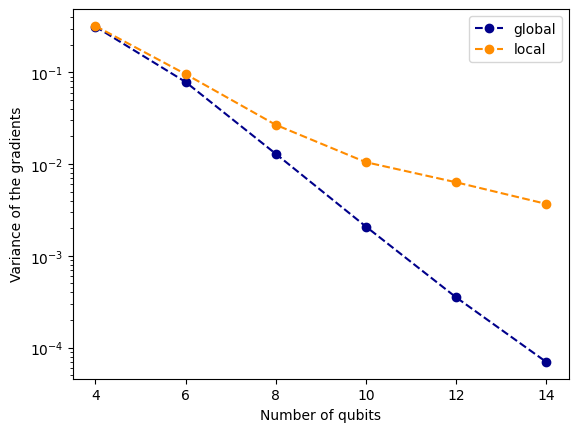

In [17]:
#plot the results
var_gradients_no_clamp = np.load("var_gradients_A=2_global.npy")
var_gradients_no_clamp_local = np.load("var_gradients_A=2_local.npy")

qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

fig, ax = plt.subplots()
ax.plot(qubits, var_gradients_no_clamp, label="global", color="darkblue", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_local, label="local", color="darkorange", linestyle="--",marker="o")

ax.set_xlabel("Number of qubits")
ax.set_ylabel("Variance of the gradients")

plt.legend()
#set log scale 
plt.yscale("log")

plt.show()



### S2D and $|A|=2$ with partial observables <a id="s2d_partial_A=2"></a>

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml

from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

var_gradients_no_clamp_local = []

ansatz="simplified_two_design"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")

    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_qubits*2, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    ZZ0 = qml.operation.Tensor(qml.PauliZ(0), qml.PauliZ(1))
    ZZ1 = qml.operation.Tensor(qml.PauliZ(0), qml.PauliZ(1))
    for i in range(2,n_qubits):
        ZZ1 = qml.operation.Tensor(ZZ1, qml.PauliZ(i))

    observables = [qml.Hamiltonian([1.0], [ZZ0]) , qml.Hamiltonian([-1.0], [ZZ1])]

    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions


In [ ]:
np.save("var_gradients_A=2_partial.npy", var_gradients_no_clamp_local)


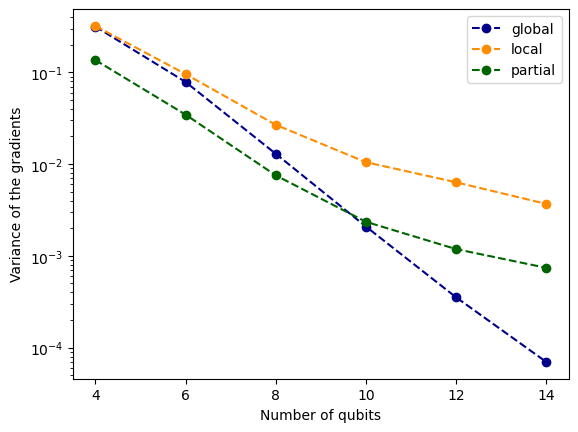

In [ ]:
#plot the results
var_gradients_no_clamp = np.load("var_gradients_A=2_global.npy")
var_gradients_no_clamp_local = np.load("var_gradients_A=2_local.npy")
var_gradients_no_clamp_partial = np.load("var_gradients_A=2_partial.npy")

qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

fig, ax = plt.subplots()
ax.plot(qubits, var_gradients_no_clamp, label="global", color="darkblue", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_local, label="local", color="darkorange", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_partial, label="partial", color="darkgreen", linestyle="--",marker="o")

ax.set_xlabel("Number of qubits")
ax.set_ylabel("Variance of the gradients")

plt.legend()
#set log scale 
plt.yscale("log")

plt.show()



### S2D and $|A|=4$ with local and global observables 

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml

from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

var_gradients_no_clamp_local = []

ansatz="simplified_two_design"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")

    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_qubits*2, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [4] for q in qubits}
    
    ZZ0 = qml.operation.Tensor(qml.PauliZ(0), qml.PauliZ(1))
    ZZ1 = qml.operation.Tensor(qml.PauliZ(0), qml.PauliZ(1))
    for i in range(2,n_qubits):
        ZZ1 = qml.operation.Tensor(ZZ1, qml.PauliZ(i))
    ZZ2 = qml.operation.Tensor(qml.PauliX(0), qml.PauliZ(1))
    for i in range(2,n_qubits):
        ZZ2 = qml.operation.Tensor(ZZ2, qml.PauliZ(i))
    ZZ3 = qml.operation.Tensor(qml.PauliZ(0), qml.PauliX(1))
    for i in range(2,n_qubits):
        ZZ3 = qml.operation.Tensor(ZZ3, qml.PauliZ(i))

    observables = [qml.Hamiltonian([1.0], [ZZ0]) , qml.Hamiltonian([1.0], [ZZ1]), qml.Hamiltonian([1.0], [ZZ2]), qml.Hamiltonian([1.0], [ZZ3])]

    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 4 actions
-Starting with 6 qubits
---Starting with 4 actions
-Starting with 8 qubits
---Starting with 4 actions
-Starting with 10 qubits
---Starting with 4 actions
-Starting with 12 qubits
---Starting with 4 actions
-Starting with 14 qubits
---Starting with 4 actions


In [ ]:
np.save("var_gradients_A=4_partial.npy", var_gradients_no_clamp_local)


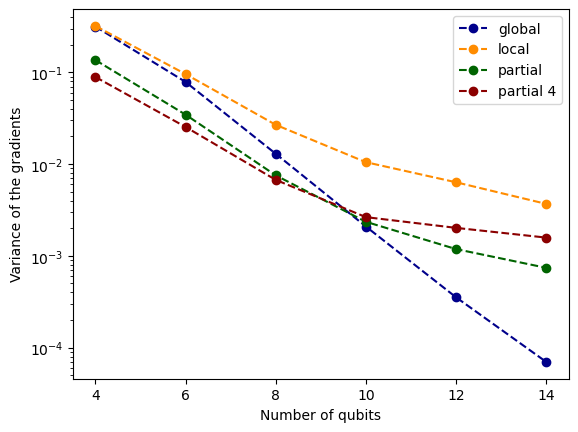

In [ ]:
#plot the results
import matplotlib.pyplot as plt

var_gradients_no_clamp = np.load("var_gradients_A=2_global.npy")
var_gradients_no_clamp_local = np.load("var_gradients_A=2_local.npy")
var_gradients_no_clamp_partial = np.load("var_gradients_A=2_partial.npy")
var_gradients_no_clamp_partial_4 = np.load("var_gradients_A=4_partial.npy")

qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

fig, ax = plt.subplots()
ax.plot(qubits, var_gradients_no_clamp, label="global", color="darkblue", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_local, label="local", color="darkorange", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_partial, label="partial", color="darkgreen", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_partial_4, label="partial 4", color="darkred", linestyle="--",marker="o")

ax.set_xlabel("Number of qubits")
ax.set_ylabel("Variance of the gradients")

plt.legend()
#set log scale 
plt.yscale("log")

plt.show()



In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

var_gradients_no_clamp_local = []

ansatz="simplified_two_design"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")

    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_qubits*2, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [8,16] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ZZ0 = qml.operation.Tensor(qml.PauliZ(0), qml.PauliZ(1))
        observables = [qml.Hamiltonian([1.0], [ZZ0])]
        for a in range(n_actions-1):
            ps = "".join(np.random.choice(["X", "Y", "Z"], n_qubits))
            pw = string_to_pauli_word(ps, wire_map={i:i for i in range(n_qubits)})
            observables.append(qml.Hamiltonian([1.0], [pw]))
            #observables.append(pw) 
    
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 8 actions
---Starting with 16 actions
-Starting with 6 qubits
---Starting with 8 actions
---Starting with 16 actions
-Starting with 8 qubits
---Starting with 8 actions
---Starting with 16 actions
-Starting with 10 qubits
---Starting with 8 actions
---Starting with 16 actions
-Starting with 12 qubits
---Starting with 8 actions
---Starting with 16 actions
-Starting with 14 qubits
---Starting with 8 actions
---Starting with 16 actions


In [ ]:
np.save("var_gradients_A=8_16_partial.npy", var_gradients_no_clamp_local)

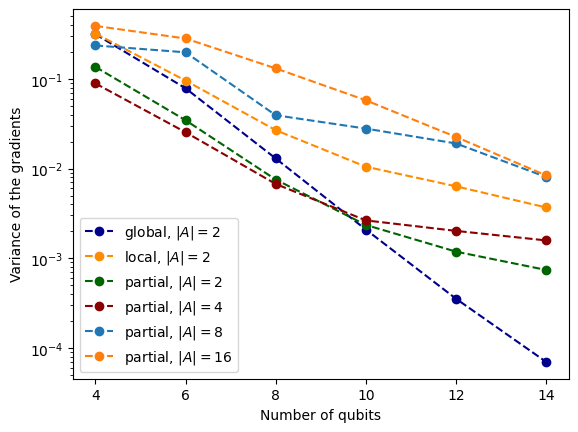

In [ ]:
#plot
import matplotlib.pyplot as plt
import numpy as np

var_gradients_no_clamp = np.load("var_gradients_A=2_global.npy")
var_gradients_no_clamp_local = np.load("var_gradients_A=2_local.npy")
var_gradients_no_clamp_partial = np.load("var_gradients_A=2_partial.npy")
var_gradients_no_clamp_partial_4 = np.load("var_gradients_A=4_partial.npy")
var_gradients_no_clamp_partial_8_16 = np.load("var_gradients_A=8_16_partial.npy")

qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

fig, ax = plt.subplots()
ax.plot(qubits, var_gradients_no_clamp, label="global, $|A|=2$", color="darkblue", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_local, label="local, $|A|=2$", color="darkorange", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_partial, label="partial, $|A|=2$", color="darkgreen", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_partial_4, label="partial, $|A|=4$", color="darkred", linestyle="--",marker="o")
for i in range(2):
    ax.plot(qubits, var_gradients_no_clamp_partial_8_16[:,i], label=f"partial, $|A|=${2**(i+3)}", linestyle="--",marker="o")

ax.set_xlabel("Number of qubits")
ax.set_ylabel("Variance of the gradients")

plt.legend()
#set log scale
plt.yscale("log")

plt.show()

### normal initialization 

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml

from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_samples=5000
initialization = "normal"

var_gradients_no_clamp_local = []

ansatz="simplified_two_design"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2

    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    ZZ = qml.operation.Tensor(qml.PauliZ(0), qml.PauliZ(1))
    for i in range(2,n_qubits):
        ZZ = qml.operation.Tensor(ZZ, qml.PauliZ(i))

    observables = [qml.Hamiltonian([1.0], [ZZ]) , qml.Hamiltonian([-1.0], [ZZ])]

    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables,initialization,n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions


In [ ]:
np.save("var_gradients_A=2_global_normal.npy", var_gradients_no_clamp_local)

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml

from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_samples=5000
initialization = "normal"

var_gradients_no_clamp_local = []

ansatz="simplified_two_design"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2

    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    ZZ = qml.operation.Tensor(qml.PauliZ(0), qml.PauliZ(1))

    observables = [qml.Hamiltonian([1.0], [ZZ]) , qml.Hamiltonian([-1.0], [ZZ])]

    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables,initialization,n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions


In [ ]:
np.save("var_gradients_A=2_local_normal.npy", var_gradients_no_clamp_local)


In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000
initialization = "normal"
var_gradients_no_clamp_local = []

ansatz="simplified_two_design"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [4,8,16] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ZZ0 = qml.operation.Tensor(qml.PauliZ(0), qml.PauliZ(1))
        observables = [qml.Hamiltonian([1.0], [ZZ0])]
        for a in range(n_actions-1):
            ps = "".join(np.random.choice(["X", "Y", "Z"], n_qubits))
            pw = string_to_pauli_word(ps, wire_map={i:i for i in range(n_qubits)})
            observables.append(qml.Hamiltonian([1.0], [pw]))
            #observables.append(pw) 
    
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 6 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 8 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 10 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 12 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 14 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions


In [ ]:
np.save("var_gradients_A=4_8_16_partial_normal.npy", var_gradients_no_clamp_local)

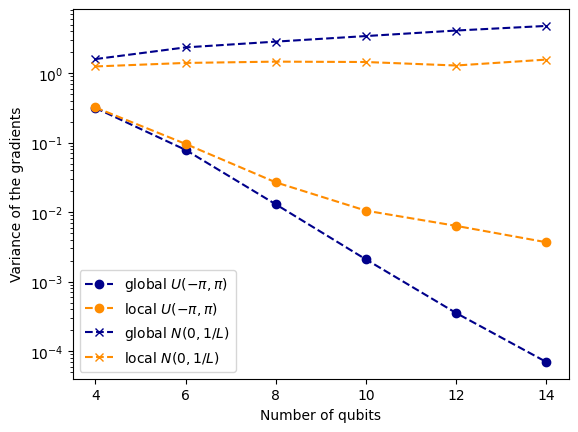

In [ ]:
import matplotlib.pyplot as plt

#plot the results
var_gradients_no_clamp = np.load("var_gradients_A=2_global.npy")
var_gradients_no_clamp_local = np.load("var_gradients_A=2_local.npy")
#var_gradients_no_clamp_partial = np.load("var_gradients_A=2_partial.npy")

var_gradients_no_clamp_normal = np.load("var_gradients_A=2_global_normal.npy")
var_gradients_no_clamp_local_normal = np.load("var_gradients_A=2_local_normal.npy")
#var_gradients_no_clamp_partial_normal = np.load("var_gradients_A=4_8_16_partial_normal.npy")

qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

fig, ax = plt.subplots()
ax.plot(qubits, var_gradients_no_clamp, label="global $U(-\pi,\pi)$", color="darkblue", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_local, label="local $U(-\pi,\pi)$", color="darkorange", linestyle="--",marker="o")

ax.plot(qubits, var_gradients_no_clamp_normal, label="global $N(0,1/L)$", color="darkblue", linestyle="--",marker="x")
ax.plot(qubits, var_gradients_no_clamp_local_normal, label="local $N(0,1/L)$", color="darkorange", linestyle="--",marker="x")


ax.set_xlabel("Number of qubits")
ax.set_ylabel("Variance of the gradients")

plt.legend()
#set log scale 
plt.yscale("log")

plt.show()



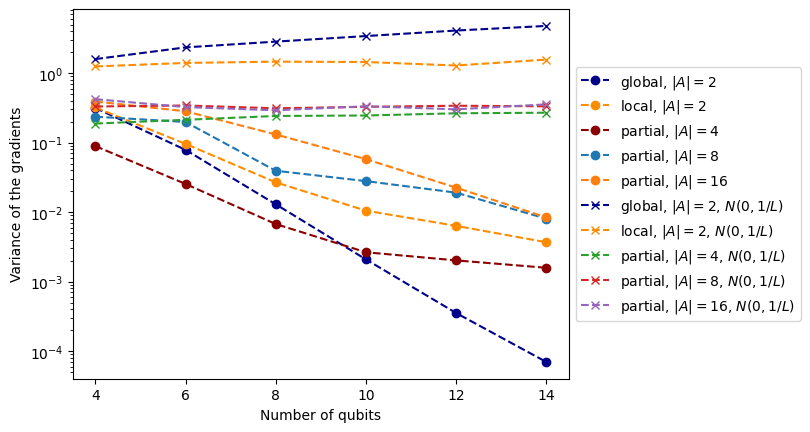

In [ ]:
#plot
import matplotlib.pyplot as plt
import numpy as np

var_gradients_no_clamp = np.load("var_gradients_A=2_global.npy")
var_gradients_no_clamp_local = np.load("var_gradients_A=2_local.npy")
var_gradients_no_clamp_partial_4 = np.load("var_gradients_A=4_partial.npy")
var_gradients_no_clamp_partial_8_16 = np.load("var_gradients_A=8_16_partial.npy")

var_gradients_no_clamp_normal = np.load("var_gradients_A=2_global_normal.npy")
var_gradients_no_clamp_local_normal = np.load("var_gradients_A=2_local_normal.npy")
var_gradients_no_clamp_partial_4_normal = np.load("var_gradients_A=4_8_16_partial_normal.npy")

qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

fig, ax = plt.subplots()
ax.plot(qubits, var_gradients_no_clamp, label="global, $|A|=2$", color="darkblue", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_local, label="local, $|A|=2$", color="darkorange", linestyle="--",marker="o")
ax.plot(qubits, var_gradients_no_clamp_partial_4, label="partial, $|A|=4$", color="darkred", linestyle="--",marker="o")
for i in range(2):
    ax.plot(qubits, var_gradients_no_clamp_partial_8_16[:,i], label=f"partial, $|A|=${2**(i+3)}", linestyle="--",marker="o")


ax.plot(qubits, var_gradients_no_clamp_normal, label="global, $|A|=2$, $N(0,1/L)$", color="darkblue", linestyle="--",marker="x")
ax.plot(qubits, var_gradients_no_clamp_local_normal, label="local, $|A|=2$, $N(0,1/L)$", color="darkorange", linestyle="--",marker="x")

for (a,j) in zip([4,8,16], [0,1,2]):
    l = "partial, $|A|={}$, $N(0,1/L)$".format(a)
    ax.plot(qubits, var_gradients_no_clamp_partial_4_normal[:,j], label=l, linestyle="--",marker="x")

ax.set_xlabel("Number of qubits")
ax.set_ylabel("Variance of the gradients")

#put legend outside the plot on the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#set log scale
plt.yscale("log")

plt.show()

## 2 - Strongly entangling layers - global and |A|=2 <a id="s2d_global_A=2"></a>

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 2000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="SEL"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    #shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    shapes = qml.StronglyEntanglingLayers.shape(n_layers=n_qubits, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*n_qubits
        pw = string_to_pauli_word(ps, wire_map={i:i for i in range(n_qubits)})
        observables = [qml.Hamiltonian([1.0], [pw]) , qml.Hamiltonian([-1.0], [pw])]
    
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions
-Starting with 16 qubits
---Starting with 2 actions


In [ ]:
np.save("var_gradients_SEL_A=2_global.npy", var_gradients_no_clamp_local)

## SEL - local and |A|=2

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="SEL"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    #shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    shapes = qml.StronglyEntanglingLayers.shape(n_layers=3, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*2
        pw = string_to_pauli_word(ps, wire_map={i:i for i in range(2)})
        observables = [qml.Hamiltonian([1.0], [pw]) , qml.Hamiltonian([-1.0], [pw])]
    
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions
-Starting with 16 qubits
---Starting with 2 actions


In [ ]:
np.save("var_gradients_SEL_A=2_local.npy", var_gradients_no_clamp_local)


## SEL - partial |A|=2

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="SEL"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    #shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    shapes = qml.StronglyEntanglingLayers.shape(n_layers=3, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*int(np.ceil(np.log(n_qubits)))
        pw1 = string_to_pauli_word(ps, wire_map={i:i for i in range(int(np.ceil(np.log(n_qubits))))})
        ps = "Z"*n_qubits
        pw2 = string_to_pauli_word(ps, wire_map={i:i for i in range(n_qubits)})
        observables = [qml.Hamiltonian([1.0], [pw1]) , qml.Hamiltonian([1.0], [pw2])]
    
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions
-Starting with 16 qubits
---Starting with 2 actions


In [ ]:
np.save("var_gradients_SEL_A=2_partial.npy", var_gradients_no_clamp_local)

## SEL - partial A = {4,8,16}

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="SEL"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    #shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    shapes = qml.StronglyEntanglingLayers.shape(n_layers=3, n_wires=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [4,8,16] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ZZ0 = "Z"*int(np.ceil(np.log(n_qubits)))
        pw1 = string_to_pauli_word(ZZ0, wire_map={i:i for i in range(int(np.ceil(np.log(n_qubits))))})
        observables = [qml.Hamiltonian([1.0], [pw1])]
        for a in range(n_actions-1):
            ps = "".join(np.random.choice(["X", "Y", "Z"], n_qubits))
            pw = string_to_pauli_word(ps, wire_map={i:i for i in range(n_qubits)})
            observables.append(qml.Hamiltonian([1.0], [pw]))
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 6 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 8 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 10 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 12 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 14 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 16 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions


In [ ]:
np.save("var_gradients_SEL_A=4_8_16_partial.npy", var_gradients_no_clamp_local)

## 3 - Random layers - global and |A|=2

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 2000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="random"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    #shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    #shapes = qml.StronglyEntanglingLayers.shape(n_layers=n_qubits, n_wires=n_qubits)
    shapes = qml.RandomLayers.shape(n_layers=5, n_rotations=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*n_qubits
        pw = string_to_pauli_word(ps, wire_map={i:i for i in range(n_qubits)})
        observables = [qml.Hamiltonian([1.0], [pw]) , qml.Hamiltonian([-1.0], [pw])]
    
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions


-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions
-Starting with 16 qubits
---Starting with 2 actions


In [ ]:
np.save("var_gradients_Random_A=2_global.npy", var_gradients_no_clamp_local)

## SEL - local and |A|=2

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="random"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    #shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    shapes = qml.RandomLayers.shape(n_layers=5, n_rotations=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*int(np.ceil(np.log(n_qubits)))
        pw = string_to_pauli_word(ps, wire_map={i:i for i in range(int(np.ceil(np.log(n_qubits))))})
        observables = [qml.Hamiltonian([1.0], [pw]) , qml.Hamiltonian([-1.0], [pw])]
    
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions
-Starting with 16 qubits
---Starting with 2 actions


In [ ]:
np.save("var_gradients_Random_A=2_local.npy", var_gradients_no_clamp_local)


## SEL - partial |A|=2

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="random"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    #shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    shapes = qml.RandomLayers.shape(n_layers=5, n_rotations=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*int(np.ceil(np.log(n_qubits)))
        pw1 = string_to_pauli_word(ps, wire_map={i:i for i in range(int(np.ceil(np.log(n_qubits))))})
        ps = "Z"*n_qubits
        pw2 = string_to_pauli_word(ps, wire_map={i:i for i in range(n_qubits)})
        observables = [qml.Hamiltonian([1.0], [pw1]) , qml.Hamiltonian([1.0], [pw2])]
    
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions
-Starting with 16 qubits
---Starting with 2 actions


In [ ]:
np.save("var_gradients_Random_A=2_partial.npy", var_gradients_no_clamp_local)

## SEL - partial A = {4,8,16}

In [ ]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="random"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    #shapes = qml.SimplifiedTwoDesign.shape(n_layers=n_layers, n_wires=n_qubits)
    shapes = qml.RandomLayers.shape(n_layers=5, n_rotations=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [4,8,16] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ZZ0 = "Z"*int(np.ceil(np.log(n_qubits)))
        pw1 = string_to_pauli_word(ZZ0, wire_map={i:i for i in range(int(np.ceil(np.log(n_qubits))))})
        observables = [qml.Hamiltonian([1.0], [pw1])]
        for a in range(n_actions-1):
            ps = "".join(np.random.choice(["X", "Y", "Z"], n_qubits))
            pw = string_to_pauli_word(ps, wire_map={i:i for i in range(n_qubits)})
            observables.append(qml.Hamiltonian([1.0], [pw]))
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 6 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 8 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 10 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 12 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 14 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions
-Starting with 16 qubits
---Starting with 4 actions
---Starting with 8 actions
---Starting with 16 actions


In [ ]:
np.save("var_gradients_Random_A=4_8_16_partial.npy", var_gradients_no_clamp_local)

### Joint plot for the three circuits and |A|=2 local vs global vs partial <a id="joint_global_local_partial"></a>

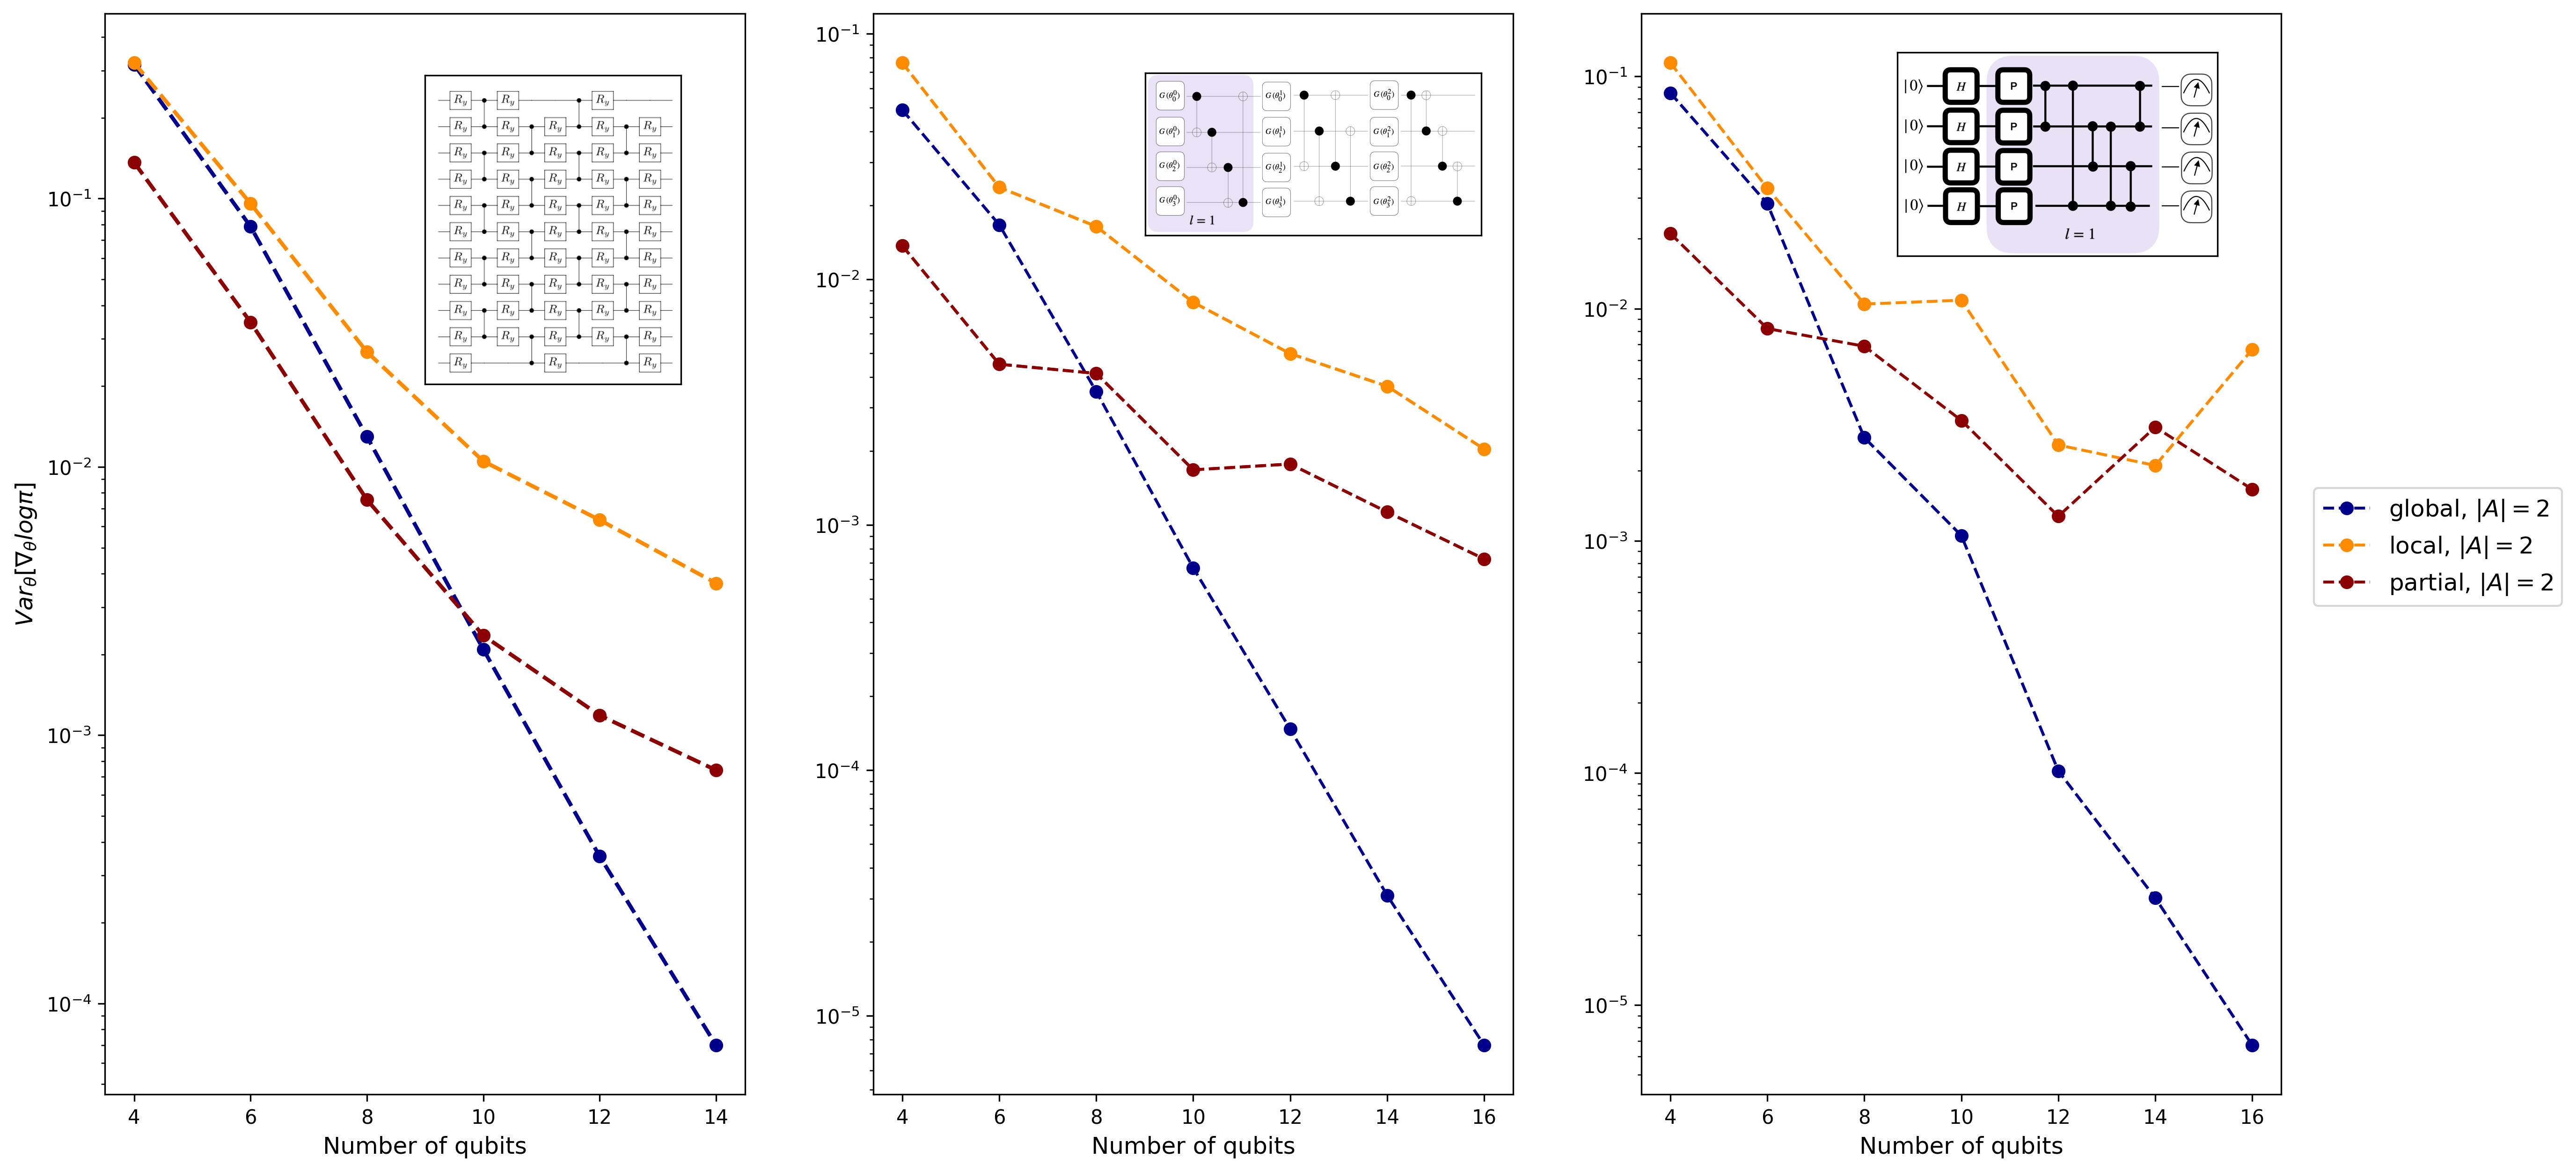

In [ ]:
#plot
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

var_gradients_no_clamp = np.load("var_gradients_A=2_global.npy")
var_gradients_no_clamp_local = np.load("var_gradients_A=2_local.npy")
var_gradients_no_clamp_partial = np.load("var_gradients_A=2_partial.npy")

var_gradients_no_clamp_sel = np.load("var_gradients_SEL_A=2_global.npy")
var_gradients_no_clamp_sel_local = np.load("var_gradients_SEL_A=2_local.npy")
var_gradients_no_clamp_sel_partial = np.load("var_gradients_SEL_A=2_partial.npy")

var_gradients_no_clamp_random = np.load("var_gradients_Random_A=2_global.npy")
var_gradients_no_clamp_random_local = np.load("var_gradients_Random_A=2_local.npy")
var_gradients_no_clamp_random_partial = np.load("var_gradients_Random_A=2_partial.npy")

qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

images=[]
image_s2d = Image.open('/Users/andresequeira/Desktop/bp_qpg_PART_I/images/S2d_ansatz.png')
image_sel = Image.open('/Users/andresequeira/Desktop/bp_qpg_PART_I/images/selansatz.png')
image_random = Image.open('/Users/andresequeira/Desktop/bp_qpg_PART_I/images/randomlayerscircuit.png')
images.append(image_s2d)
images.append(image_sel)
images.append(image_random)
#create figure with three subplots
fig, ax = plt.subplots(1,3, figsize=(20,10))

ax[0].plot(qubits, var_gradients_no_clamp, label="global, $|A|=2$", color="darkblue", linestyle="--",marker="o",linewidth=2)
ax[0].plot(qubits, var_gradients_no_clamp_local, label="local, $|A|=2$", color="darkorange", linestyle="--",marker="o",linewidth=2)
ax[0].plot(qubits, var_gradients_no_clamp_partial, label="partial, $|A|=2$", color="darkred", linestyle="--",marker="o",linewidth=2)

inset_ax = inset_axes(ax[0], width="40%", height="40%", loc="upper right",bbox_to_anchor=(-0.1,0, 1,1), bbox_transform=ax[0].transAxes, borderpad=0)
            
inset_ax.imshow(images[0])
inset_ax.set_xticks([])
inset_ax.set_yticks([])

ax[0].set_xlabel("Number of qubits", fontsize=12)
ax[0].set_ylabel(r"$Var_\theta [\nabla_\theta log \pi]$", fontsize=12)

#set log plot 
ax[0].set_yscale("log")




qubits = [4,6,8,10,12,14,16]

ax[1].plot(qubits, var_gradients_no_clamp_sel, label="global, $|A|=2$", color="darkblue", linestyle="--",marker="o")
ax[1].plot(qubits, var_gradients_no_clamp_sel_local, label="local, $|A|=2$", color="darkorange", linestyle="--",marker="o")
p = np.polyfit(qubits, var_gradients_no_clamp_sel_local,6)
ax[1].plot(qubits, np.polyval(p, qubits), color="darkorange", linestyle="--",label="local, $|A|=2$ (fit)")
ax[1].plot(qubits, var_gradients_no_clamp_sel_partial, label="partial, $|A|=2$", color="darkred", linestyle="--",marker="o")
p = np.polyfit(qubits, var_gradients_no_clamp_sel_partial, 6)
ax[1].plot(qubits, np.polyval(p, qubits), color="darkred", linestyle="--",label="partial, $|A|=2$ (fit)")

inset_ax = inset_axes(ax[1], width="50%", height="50%", loc="upper right",bbox_to_anchor=(-0.1,0.12, 1.05,1), bbox_transform=ax[1].transAxes, borderpad=0)
inset_ax.imshow(images[1])
inset_ax.set_xticks([])
inset_ax.set_yticks([])

ax[1].set_xlabel("Number of qubits", fontsize=12)
#ax[1].set_ylabel("Variance of the gradients")

ax[1].set_yscale("log")

ax[2].plot(qubits, var_gradients_no_clamp_random, label="global, $|A|=2$", color="darkblue", linestyle="--",marker="o")
ax[2].plot(qubits, var_gradients_no_clamp_random_local, label="local, $|A|=2$", color="darkorange", linestyle="--",marker="o")

ax[2].plot(qubits, var_gradients_no_clamp_random_partial, label="partial, $|A|=2$", color="darkred", linestyle="--",marker="o")


inset_ax = inset_axes(ax[2], width="50%", height="50%", loc="upper right",bbox_to_anchor=(-0.1,0.12,1,1), bbox_transform=ax[2].transAxes, borderpad=0)
inset_ax.imshow(images[2])
inset_ax.set_xticks([])
inset_ax.set_yticks([])

ax[2].set_yscale("log")

#put legend outside the plot on the right
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[2].legend(bbox_to_anchor=(1, 0.5), loc='center right', borderaxespad=0, bbox_transform=fig.transFigure, fontsize=12)

ax[2].set_xlabel("Number of qubits", fontsize=12)
#ax[2].set_ylabel("Variance of the gradients")


#set dpi to 300 not savefig
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300



plt.show()

### Joint plot for the three circuits and A={4,8,16} local vs global vs partial <a id="joint_global_local_partial_A=4_8_16"></a>

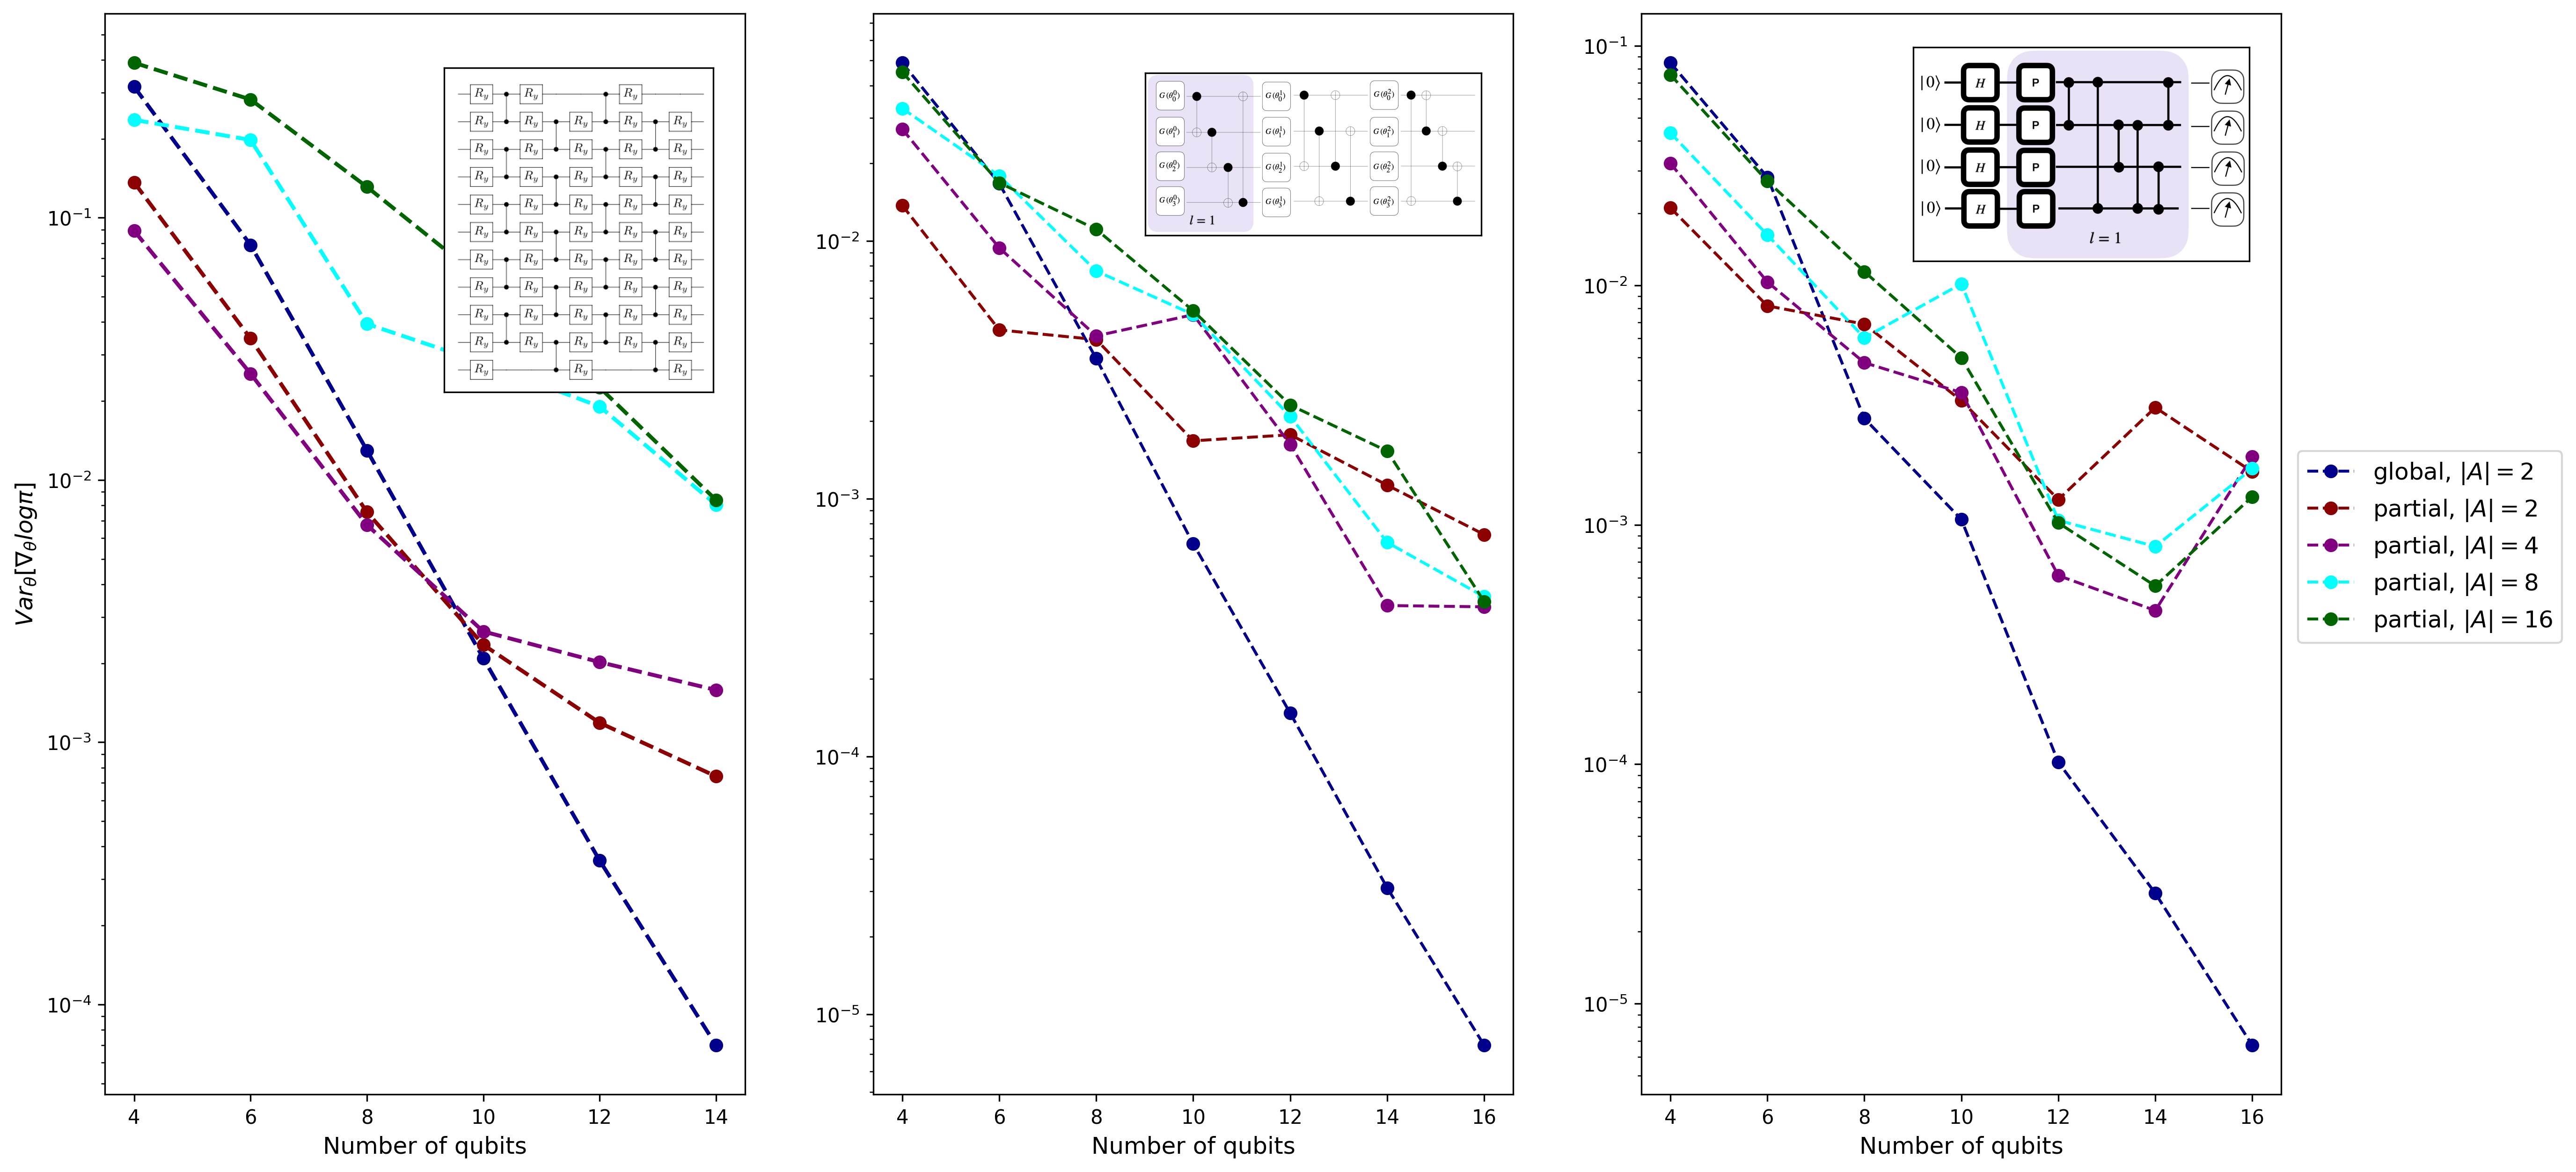

In [ ]:
#plot
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

var_gradients_no_clamp = np.load("var_gradients_A=2_global.npy")
var_gradients_no_clamp_partial = np.load("var_gradients_A=2_partial.npy")
var_gradients_no_clamp_partial_4 = np.load("var_gradients_A=4_partial.npy")
var_gradients_no_clamp_partial_8_16 = np.load("var_gradients_A=8_16_partial.npy")

var_gradients_no_clamp_sel = np.load("var_gradients_SEL_A=2_global.npy")
var_gradients_no_clamp_sel_partial = np.load("var_gradients_SEL_A=2_partial.npy")
var_gradients_no_clamp_sel_partial_4_8_16 = np.load("var_gradients_SEL_A=4_8_16_partial.npy")

var_gradients_no_clamp_random = np.load("var_gradients_Random_A=2_global.npy")
var_gradients_no_clamp_random_partial = np.load("var_gradients_Random_A=2_partial.npy")
var_gradients_no_clamp_random_partial_4_8_16 = np.load("var_gradients_Random_A=4_8_16_partial.npy")

qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000

images=[]
image_s2d = Image.open('/Users/andresequeira/Desktop/bp_qpg_PART_I/images/S2d_ansatz.png')
image_sel = Image.open('/Users/andresequeira/Desktop/bp_qpg_PART_I/images/selansatz.png')
image_random = Image.open('/Users/andresequeira/Desktop/bp_qpg_PART_I/images/randomlayerscircuit.png')
images.append(image_s2d)
images.append(image_sel)
images.append(image_random)
#create figure with three subplots
fig, ax = plt.subplots(1,3, figsize=(20,10))

ax[0].plot(qubits, var_gradients_no_clamp, label="global, $|A|=2$", color="darkblue", linestyle="--",marker="o",linewidth=2)
ax[0].plot(qubits, var_gradients_no_clamp_partial, label="partial, $|A|=2$", color="darkred", linestyle="--",marker="o",linewidth=2)
ax[0].plot(qubits, var_gradients_no_clamp_partial_4, label="partial, $|A|=4$", color="purple", linestyle="--",marker="o",linewidth=2)
colors = ["cyan", "darkgreen"]
for i in range(2):
    ax[0].plot(qubits, var_gradients_no_clamp_partial_8_16[:,i], label=f"partial, $|A|=${2**(i+3)}", linestyle="--",marker="o",linewidth=2, color=colors[i])


inset_ax = inset_axes(ax[0], width="40%", height="40%", loc="upper right",bbox_to_anchor=(-0.1,0, 1.05,1), bbox_transform=ax[0].transAxes, borderpad=0)
            
inset_ax.imshow(images[0])
inset_ax.set_xticks([])
inset_ax.set_yticks([])

ax[0].set_xlabel("Number of qubits", fontsize=12)
ax[0].set_ylabel(r"$Var_\theta [\nabla_\theta log \pi]$", fontsize=12)

#set log plot 
ax[0].set_yscale("log")




qubits = [4,6,8,10,12,14,16]

ax[1].plot(qubits, var_gradients_no_clamp_sel, label="global, $|A|=2$", color="darkblue", linestyle="--",marker="o")
ax[1].plot(qubits, var_gradients_no_clamp_sel_partial, label="partial, $|A|=2$", color="darkred", linestyle="--",marker="o")

colors = ["purple", "cyan", "darkgreen"]
for (a,j) in zip([4,8,16], [0,1,2]):
    l = "partial, $|A|={}$".format(a)
    ax[1].plot(qubits, var_gradients_no_clamp_sel_partial_4_8_16[:,j], label=l, linestyle="--",marker="o", color=colors[j])

inset_ax = inset_axes(ax[1], width="50%", height="50%", loc="upper right",bbox_to_anchor=(-0.1,0.12, 1.05,1), bbox_transform=ax[1].transAxes, borderpad=0)
inset_ax.imshow(images[1])
inset_ax.set_xticks([])
inset_ax.set_yticks([])

ax[1].set_xlabel("Number of qubits", fontsize=12)
#ax[1].set_ylabel("Variance of the gradients")

ax[1].set_yscale("log")

ax[2].plot(qubits, var_gradients_no_clamp_random, label="global, $|A|=2$", color="darkblue", linestyle="--",marker="o")

ax[2].plot(qubits, var_gradients_no_clamp_random_partial, label="partial, $|A|=2$", color="darkred", linestyle="--",marker="o")
for (a,j) in zip([4,8,16], [0,1,2]):
    l = "partial, $|A|={}$".format(a)
    ax[2].plot(qubits, var_gradients_no_clamp_random_partial_4_8_16[:,j], label=l, linestyle="--",marker="o", color=colors[j])

inset_ax = inset_axes(ax[2], width="50%", height="50%", loc="upper right",bbox_to_anchor=(-0.1,0.12,1.05,1), bbox_transform=ax[2].transAxes, borderpad=0)
inset_ax.imshow(images[2])
inset_ax.set_xticks([])
inset_ax.set_yticks([])

ax[2].set_yscale("log")

#put legend outside the plot on the right
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[2].legend(bbox_to_anchor=(1, 0.5), loc='center right', borderaxespad=0, bbox_transform=fig.transFigure , fontsize=12)

ax[2].set_xlabel("Number of qubits", fontsize=12)
#ax[2].set_ylabel("Variance of the gradients")

#set log scale

plt.show()

### Simplified Two Design - Parity like Born policy |A|=2 <a id="s2d_parity_A=2"></a>

In [1]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="simplified_two_design"
policy_type = "parity-like"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    shapes = qml.SimplifiedTwoDesign.shape(n_layers=5, n_wires=n_qubits)
    #shapes = qml.RandomLayers.shape(n_layers=5, n_rotations=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [2] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        observables=[]
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers, policy_type)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())

        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 2 actions
-Starting with 6 qubits
---Starting with 2 actions
-Starting with 8 qubits
---Starting with 2 actions
-Starting with 10 qubits
---Starting with 2 actions
-Starting with 12 qubits
---Starting with 2 actions
-Starting with 14 qubits
---Starting with 2 actions
-Starting with 16 qubits
---Starting with 2 actions


In [2]:
np.save("var_gradients_S2D_A=2_parity-like.npy", var_gradients_no_clamp_local)

[[0.027597292413325356], [0.012650739309520702], [0.00719504600726668], [0.0038753220773271083], [0.0018153515391641022], [0.000826725999215013], [0.0003156092384258397]]


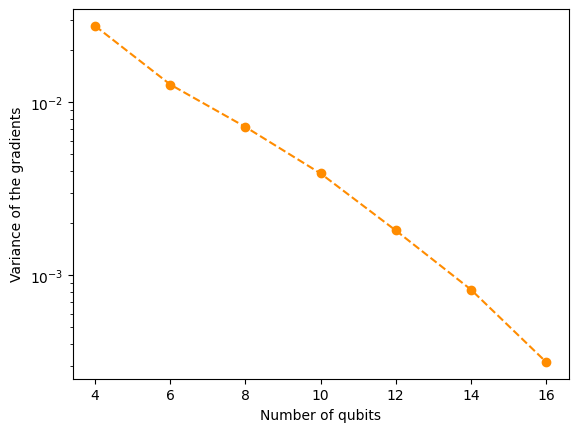

In [3]:
import matplotlib.pyplot as plt
print(var_gradients_no_clamp_local)
plt.plot(qubits, var_gradients_no_clamp_local, label="local, $|A|=2$", color="darkorange", linestyle="--",marker="o")
plt.xlabel("Number of qubits")
plt.ylabel("Variance of the gradients")

#yscale log 
plt.yscale("log")

plt.show()

### Simplified Two Design - Mixed policy |A|=3 <a id="s2d_mixed_A=3"></a>

In [1]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="simplified_two_design"
policy_type = "mixed"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    shapes = qml.SimplifiedTwoDesign.shape(n_layers=5, n_wires=n_qubits)
    #shapes = qml.RandomLayers.shape(n_layers=5, n_rotations=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [3] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*2
        pw = string_to_pauli_word(ps, wire_map={i:i for i in range(2)})
        observables = [qml.Hamiltonian([1.0], [pw])]
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers, policy_type)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())
        
        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 3 actions
-Starting with 6 qubits
---Starting with 3 actions
-Starting with 8 qubits
---Starting with 3 actions
-Starting with 10 qubits
---Starting with 3 actions
-Starting with 12 qubits
---Starting with 3 actions
-Starting with 14 qubits
---Starting with 3 actions
-Starting with 16 qubits
---Starting with 3 actions


In [2]:
np.save("var_gradients_S2D_A=3_mixed.npy", var_gradients_no_clamp_local)

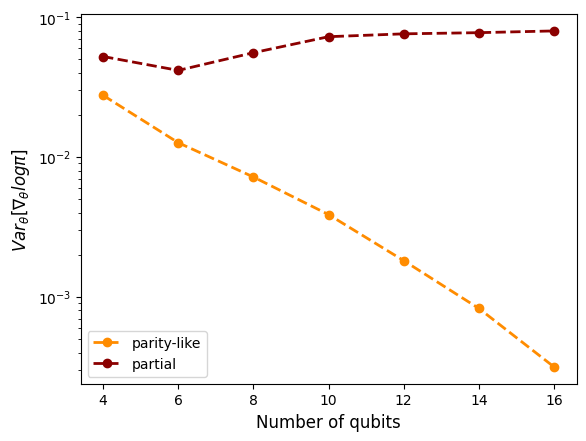

In [5]:
import matplotlib.pyplot as plt

var_gradients_parity_like = np.load("var_gradients_S2D_A=2_parity-like.npy")
var_gradients_mixed = np.load("var_gradients_S2D_A=3_mixed.npy")

plt.plot(qubits, var_gradients_parity_like, label="parity-like", color="darkorange", linestyle="--",marker="o", linewidth=2)
plt.plot(qubits, var_gradients_mixed, label="partial", color="darkred", linestyle="--",marker="o", linewidth=2)

plt.xlabel("Number of qubits", fontsize=12)
plt.ylabel(r"$Var_\theta [\nabla_\theta log \pi]$", fontsize=12)

#yscale log 
plt.yscale("log")

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.legend()
plt.show()

In [19]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 5
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="SEL"
policy_type = "mixed"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    shapes = qml.StronglyEntanglingLayers.shape(n_layers=3, n_wires=n_qubits)
    #shapes = qml.RandomLayers.shape(n_layers=5, n_rotations=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [3] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*2
        pw = string_to_pauli_word(ps, wire_map={i:i for i in range(2)})
        observables = [qml.Hamiltonian([1.0], [pw])]
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers, policy_type)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())
        
        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 3 actions
-Starting with 6 qubits
---Starting with 3 actions
-Starting with 8 qubits
---Starting with 3 actions
-Starting with 10 qubits
---Starting with 3 actions
-Starting with 12 qubits
---Starting with 3 actions
-Starting with 14 qubits
---Starting with 3 actions
-Starting with 16 qubits
---Starting with 3 actions


In [20]:
np.save("var_gradients_SEL_A=3_mixed.npy", var_gradients_no_clamp_local)

In [1]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_layers = 5
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="SEL"
policy_type = "parity-like"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    shapes = qml.StronglyEntanglingLayers.shape(n_layers=3, n_wires=n_qubits)
    #shapes = qml.RandomLayers.shape(n_layers=5, n_rotations=n_qubits)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [3] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*2
        pw = string_to_pauli_word(ps, wire_map={i:i for i in range(2)})
        observables = [qml.Hamiltonian([1.0], [pw])]
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers, policy_type)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())
        
        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 3 actions
-Starting with 6 qubits
---Starting with 3 actions
-Starting with 8 qubits
---Starting with 3 actions
-Starting with 10 qubits
---Starting with 3 actions
-Starting with 12 qubits
---Starting with 3 actions
-Starting with 14 qubits
---Starting with 3 actions


In [2]:
np.save("var_gradients_SEL_A=2_parity-like_.npy", var_gradients_no_clamp_local)

In [1]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14,16]
n_layers = 2
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="random"
policy_type = "mixed"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    #shapes = qml.RandomLayers.shape(n_layers=3, n_rotations=n_qubits)
    shapes = (n_qubits,)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [3] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*2
        pw = string_to_pauli_word(ps, wire_map={i:i for i in range(2)})
        observables = [qml.Hamiltonian([1.0], [pw])]
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers, policy_type)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())
        
        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 3 actions
-Starting with 6 qubits
---Starting with 3 actions
-Starting with 8 qubits
---Starting with 3 actions
-Starting with 10 qubits
---Starting with 3 actions
-Starting with 12 qubits
---Starting with 3 actions
-Starting with 14 qubits
---Starting with 3 actions
-Starting with 16 qubits
---Starting with 3 actions


In [2]:
np.save("var_gradients_Random_A=3_mixed_random.npy", var_gradients_no_clamp_local)

In [1]:
from concurrent.futures import ProcessPoolExecutor
import concurrent.futures
import os
import numpy as np
import pennylane as qml
from pennylane.pauli import PauliWord, pauli_word_to_matrix, string_to_pauli_word
from helper import compute_policy_and_gradient

# Main part of the code
qubits = [4,6,8,10,12,14]
n_layers = 1
n_samples = 5000
initialization = "random"
var_gradients_no_clamp_local = []

ansatz="random"
policy_type = "parity-like"

for n_qubits in qubits:
    var_gradients_actions_no_clamp = []
    print(f"-Starting with {n_qubits} qubits")
    n_layers = n_qubits*2
    #shapes = qml.RandomLayers.shape(n_layers=3, n_rotations=n_qubits)
    shapes = (n_qubits,)
    #actions = {q: [2**q] for q in qubits}
    actions = {q: [3] for q in qubits}
    
    for n_actions in actions[n_qubits]:
        print(f"---Starting with {n_actions} actions")

        ps = "Z"*2
        pw = string_to_pauli_word(ps, wire_map={i:i for i in range(2)})
        observables = [qml.Hamiltonian([1.0], [pw])]
        gradients_no_clamp = []

        # Parallel processing
        with ProcessPoolExecutor(max_workers=os.cpu_count()) as executor:
            future_to_gradient = {executor.submit(compute_policy_and_gradient, (n_qubits, shapes, ansatz, n_actions, observables, initialization, n_layers, policy_type)): s for s in range(n_samples)}
            for future in concurrent.futures.as_completed(future_to_gradient):
                gradients_no_clamp.append(future.result())
        
        var_gradients_actions_no_clamp.append(np.var(gradients_no_clamp))

    var_gradients_no_clamp_local.append(var_gradients_actions_no_clamp)

-Starting with 4 qubits
---Starting with 3 actions
-Starting with 6 qubits
---Starting with 3 actions
-Starting with 8 qubits
---Starting with 3 actions
-Starting with 10 qubits
---Starting with 3 actions
-Starting with 12 qubits
---Starting with 3 actions
-Starting with 14 qubits
---Starting with 3 actions
-Starting with 16 qubits
---Starting with 3 actions


In [2]:
np.save("var_gradients_Random_A=2_parity-like.npy", var_gradients_no_clamp_local)

### Joint plot for the three circuits and |A|=3 parity-like and local observable <a id="joint_global_local_partial_A=3"></a>

[[0.00825357]
 [0.00355091]
 [0.00451534]
 [0.00230598]
 [0.00148354]
 [0.0012972 ]]
[[0.02272336]
 [0.00620908]
 [0.00425432]
 [0.00341963]
 [0.00243389]
 [0.00232503]
 [0.00099713]]


ValueError: x and y must have same first dimension, but have shapes (6,) and (7, 1)

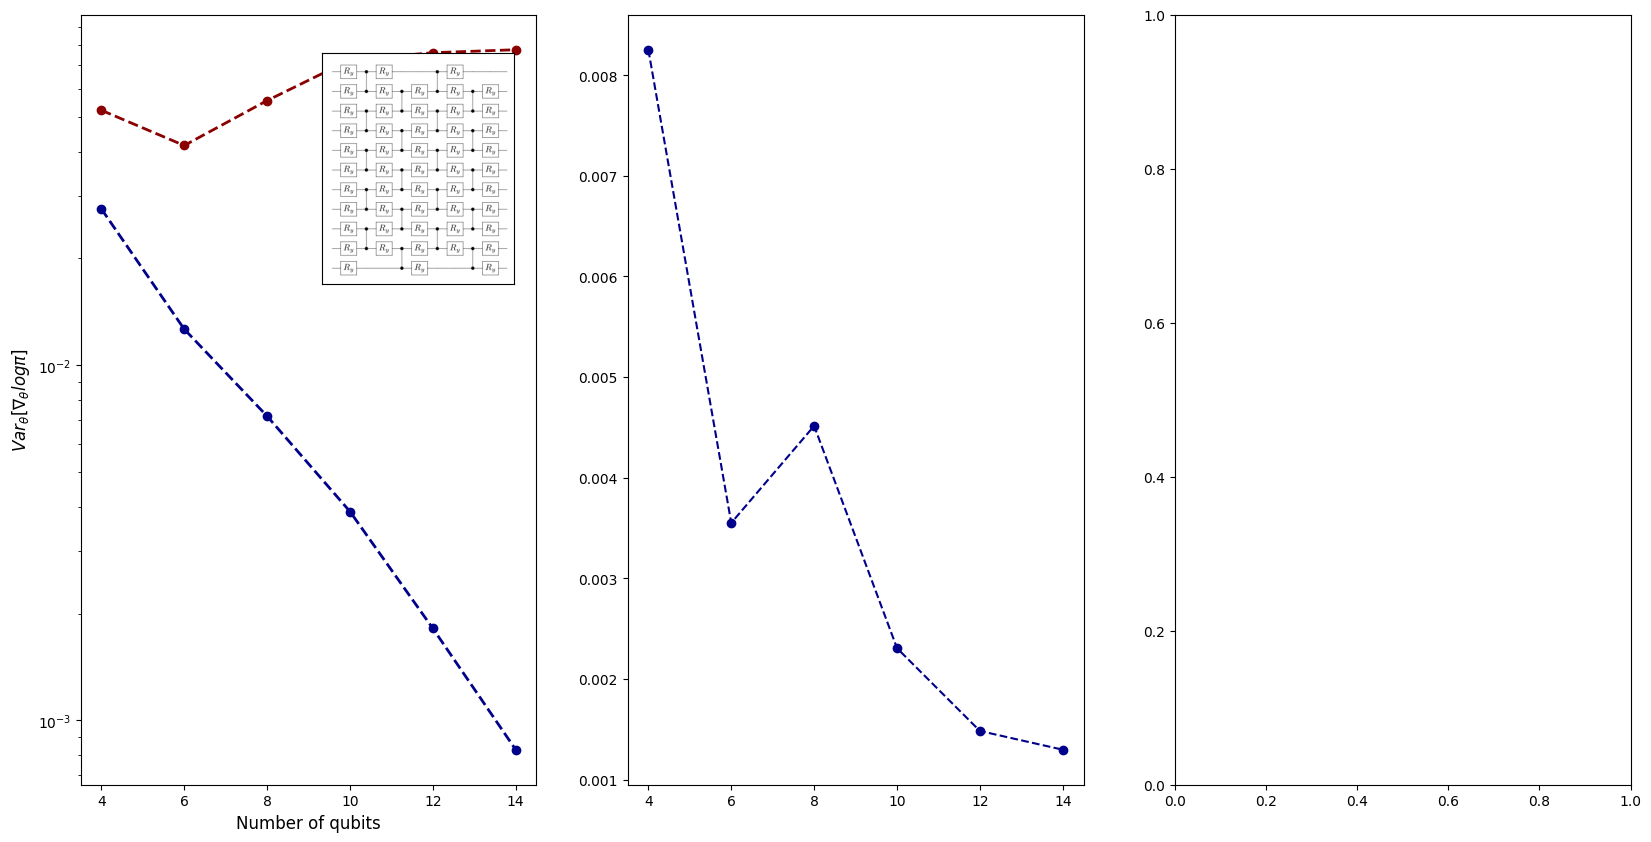

In [5]:
#plot
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

var_gradients_parity_like = np.load("var_gradients_S2D_A=2_parity-like.npy")
var_gradients_mixed = np.load("var_gradients_S2D_A=3_mixed.npy")

var_gradients_parity_like_sel = np.load("var_gradients_SEL_A=2_parity-like_.npy")
print(var_gradients_parity_like_sel)
var_gradients_mixed_sel = np.load("var_gradients_SEL_A=3_mixed.npy")
print(var_gradients_mixed_sel)

#var_gradients_parity_like_random = np.load("var_gradients_Random_A=2_parity-like.npy")
var_gradients_mixed_random = np.load("var_gradients_Random_A=3_mixed_random.npy")

qubits = [4,6,8,10,12,14]
n_layers = 2
n_samples = 5000

images=[]
image_s2d = Image.open('/Users/andresequeira/Desktop/bp_qpg_PART_I/images/S2d_ansatz.png')
image_sel = Image.open('/Users/andresequeira/Desktop/bp_qpg_PART_I/images/selansatz.png')
image_random = Image.open('/Users/andresequeira/Desktop/bp_qpg_PART_I/images/randomlayerscircuit.png')
images.append(image_s2d)
images.append(image_sel)
images.append(image_random)
#create figure with three subplots
fig, ax = plt.subplots(1,3, figsize=(20,10))

ax[0].plot(qubits, var_gradients_parity_like[:-1], label="parity-like", color="darkblue", linestyle="--",marker="o",linewidth=2)
ax[0].plot(qubits, var_gradients_mixed[:-1], label="parity-like + local", color="darkred", linestyle="--",marker="o",linewidth=2)

inset_ax = inset_axes(ax[0], width="40%", height="40%", loc="upper right",bbox_to_anchor=(-0.1,0, 1.05,1), bbox_transform=ax[0].transAxes, borderpad=0)
            
inset_ax.imshow(images[0])
inset_ax.set_xticks([])
inset_ax.set_yticks([])

ax[0].set_xlabel("Number of qubits", fontsize=12)
ax[0].set_ylabel(r"$Var_\theta [\nabla_\theta log \pi]$", fontsize=12)

#set log plot 
ax[0].set_yscale("log")




qubits = [4,6,8,10,12,14]

ax[1].plot(qubits, var_gradients_parity_like_sel, label="parity-like", color="darkblue", linestyle="--",marker="o")


ax[1].plot(qubits, var_gradients_mixed_sel, label="parity-like + local", color="darkred", linestyle="--",marker="o")

inset_ax = inset_axes(ax[1], width="50%", height="50%", loc="upper right",bbox_to_anchor=(-0.1,0.12, 1.05,1), bbox_transform=ax[1].transAxes, borderpad=0)
inset_ax.imshow(images[1])
inset_ax.set_xticks([])
inset_ax.set_yticks([])

ax[1].set_xlabel("Number of qubits", fontsize=12)
#ax[1].set_ylabel("Variance of the gradients")

ax[1].set_yscale("log")

qubits = [4,6,8,10,12,14,16]

#ax[2].plot(qubits, var_gradients_parity_like_random, label="parity-like", color="darkblue", linestyle="--",marker="o")

ax[2].plot(qubits, var_gradients_mixed_random, label="parity-lile + local", color="darkred", linestyle="--",marker="o")

inset_ax = inset_axes(ax[2], width="50%", height="50%", loc="upper right",bbox_to_anchor=(-0.1,0.12,1.05,1), bbox_transform=ax[2].transAxes, borderpad=0)
inset_ax.imshow(images[2])
inset_ax.set_xticks([])
inset_ax.set_yticks([])

ax[2].set_yscale("log")

#put legend outside the plot on the right
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax[2].legend(bbox_to_anchor=(1, 0.5), loc='center right', borderaxespad=0, bbox_transform=fig.transFigure , fontsize=12)

ax[2].set_xlabel("Number of qubits", fontsize=12)
#ax[2].set_ylabel("Variance of the gradients")

#set log scale

plt.show()